# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar data cleaning and preparation as we did in the FTE. Specifically, at least complete these minimum requirements:

- Check for outliers in numeric data, and deal with them if needed
- Check for missing values, and decide how to deal with them if needed
- Convert categorical columns to numeric values
- Create at least one new feature by combining multiple columns. For example, you could calculate the ratio of total charges to tenure. Create at least one plot for your new feature.
- Save the data to a csv (or another filetype of your choice) for use next week.
- Write a short analysis at the end of the notebook describing your findings and what you did.

You can do more data cleaning, preparation, and EDA beyond these basic requirements if you want to learn more and develop your data science skills. For example, you could use a box-cox transformation on the numeric data or try other outlier methods.

### DS process status

Here is our data science process, and where we are (#3):

**1. Business understanding**

Can we use machine learning to predict if a customer will churn before they leave?

**2. Data understanding**

Done in week 1 (mostly), this is iterative so you might do more of this as we go on.

**3. Data preparation**

We are here this week.


**4. Modeling**

Next week


**5. Evaluation**

Next week


**6. Deployment**

Next week

Creating a data frame to check on the values

In [2]:
  import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

/Users/puneet/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/puneet/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [109]:
df = pd.read_csv('~/documents/MSDS_VaishaliWork/MSDS600_DataScience/Week1_Lab1_Python/Assignment1/churn_data.csv')
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [6]:
import seaborn as sns

%matplotlib inline

In [110]:
# Checking for column type to figure out numeric columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


# Checking for outliers
Looking for outliers based on tenure and other numeric columns. 

<Axes: >

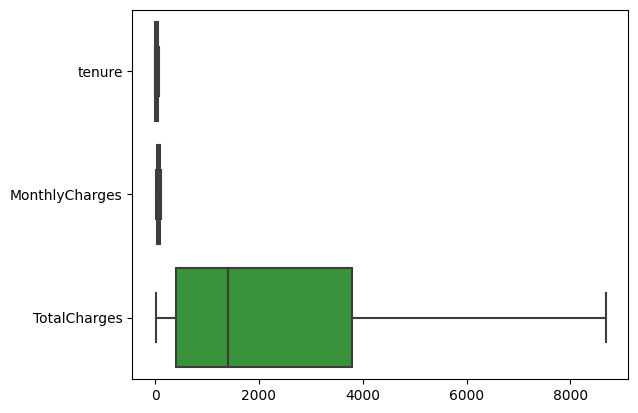

In [111]:
sns.boxplot(data=df, orient='h')

In [112]:
# IQR method - checking the boundary values
column = 'tenure'
q1 = df[column].quantile(0.25)
print(q1)
q3 = df[column].quantile(0.75)
print(q3)
iqr = q3 - q1
print(iqr)
upper_boundary = q3 + 1.5 * iqr
print(upper_boundary)
lower_boundary = q1 - 1.5 * iqr
print(lower_boundary)
df[(df[column] < lower_boundary) | (df[column] > upper_boundary)][column]

9.0
55.0
46.0
124.0
-60.0


Series([], Name: tenure, dtype: int64)

There are no major outliers as such in tenure and other columns. Checking for unique values if any clean up is required.

In [12]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

# Data with tenure as 0 and monthly charges as positive values
By looking at data we realize we have only few values with tenure as "0" and also that looks incorrect data as monthly charges is some positive value for those records. Ideally if tenure is zero monthly charges should also be zero. So removing this data 

In [113]:
# Copying data to another data frame
df_copy = df.copy()
df_copy

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [114]:
# Dropping all the values where tenure is 0.
df_copy = df_copy.drop(df_copy[df_copy['tenure'] == 0].index)
df_copy

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


Deleted the 11 records with tenure as 0.

# Missing Values
Next step to data cleaning is based on any null values. We observed few records where total charges were zero. Those records were also the ones where tenure is 0. So the records are already dropped. 
Also done "inplace = true" to update the df "df_copy".

In [115]:
df_copy.dropna(inplace = True)
df_copy

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


# Customer Id
Customer id column is also not a deciding factor to check on churn rate but keeping the same in data frame as of now.

In [ ]:
df_copy.drop(columns='customerID', inplace=True)

In [119]:
df_copy

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,34,Yes,One year,Mailed check,56.95,1889.50,No
2,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
7038,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


<Axes: >

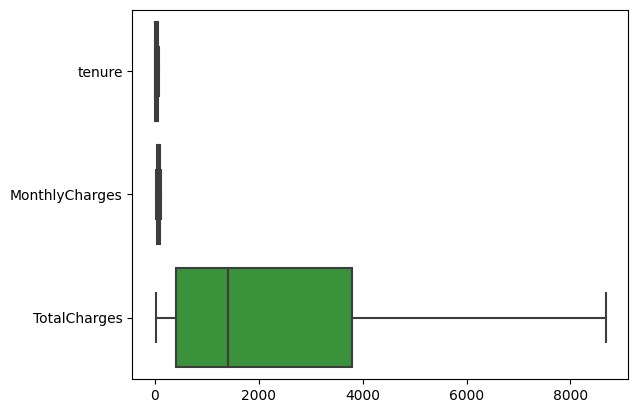

In [67]:
# Again checking the boxplot.
sns.boxplot(data=df_copy, orient='h')

This is almost the same as we did not had major outliers.

# Converting categorical columns to numeric values

In [121]:
# Replacing "churn" field to numerical values 0 and 1
df_copy['Churn'] = df_copy['Churn'].replace({'No': 0, 'Yes': 1})
df_copy['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

The column "Churn" is converted to numeric values "0" and "1"

In [72]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [122]:
df_copy['PhoneService'] = df_copy['PhoneService'].replace({'No': 0, 'Yes': 1})
df_copy['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7032, dtype: int64

Phoneservice column is also updated to numeric.

In [75]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [123]:
df_copy['Contract'] = df_copy['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year':2})
df_copy['Contract']

0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    2
Name: Contract, Length: 7032, dtype: int64

In [77]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [124]:
df_copy['PaymentMethod'] = df_copy['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
df_copy['PaymentMethod']

0       0
1       1
2       1
3       2
4       0
       ..
7038    1
7039    3
7040    0
7041    1
7042    2
Name: PaymentMethod, Length: 7032, dtype: int64

In [125]:
df_copy

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,29.85,29.85,0
1,34,1,1,1,56.95,1889.50,0
2,2,1,0,1,53.85,108.15,1
3,45,0,1,2,42.30,1840.75,0
4,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...
7038,24,1,1,1,84.80,1990.50,0
7039,72,1,1,3,103.20,7362.90,0
7040,11,0,0,0,29.60,346.45,0
7041,4,1,0,1,74.40,306.60,1


In [126]:
# Now all the columns are converted to numeric 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   PhoneService    7032 non-null   int64  
 2   Contract        7032 non-null   int64  
 3   PaymentMethod   7032 non-null   int64  
 4   MonthlyCharges  7032 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7032 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 439.5 KB


# Combining Columns
Ratio of total charges to tenure 

In [96]:
import numpy as np
df_copy['totalCharges_tenure_ratio'] = df_copy['TotalCharges'] / df_copy['tenure']
df_copy['totalCharges_tenure_ratio']

customerID
7590-VHVEG     29.850000
5575-GNVDE     55.573529
3668-QPYBK     54.075000
7795-CFOCW     40.905556
9237-HQITU     75.825000
                 ...    
6840-RESVB     82.937500
2234-XADUH    102.262500
4801-JZAZL     31.495455
8361-LTMKD     76.650000
3186-AJIEK    103.704545
Name: totalCharges_tenure_ratio, Length: 7032, dtype: float64

In [128]:
df_copy

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,29.85,29.85,0
1,34,1,1,1,56.95,1889.50,0
2,2,1,0,1,53.85,108.15,1
3,45,0,1,2,42.30,1840.75,0
4,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...
7038,24,1,1,1,84.80,1990.50,0
7039,72,1,1,3,103.20,7362.90,0
7040,11,0,0,0,29.60,346.45,0
7041,4,1,0,1,74.40,306.60,1


# Plot for new feature - Total charges and tenure ratio

<Axes: ylabel='Frequency'>

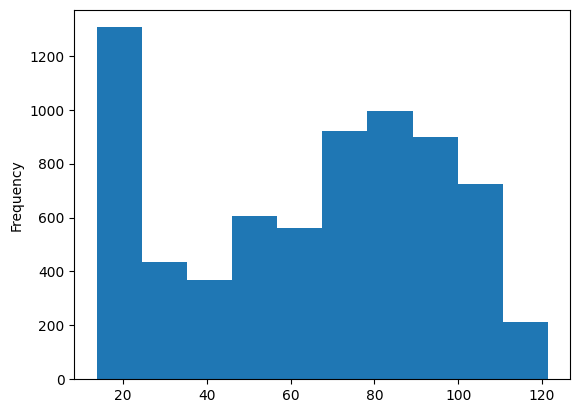

In [97]:
df_copy['totalCharges_tenure_ratio'].plot.hist()

# Histogram with new feature and target "Churn" as hue

<Axes: xlabel='totalCharges_tenure_ratio', ylabel='Count'>

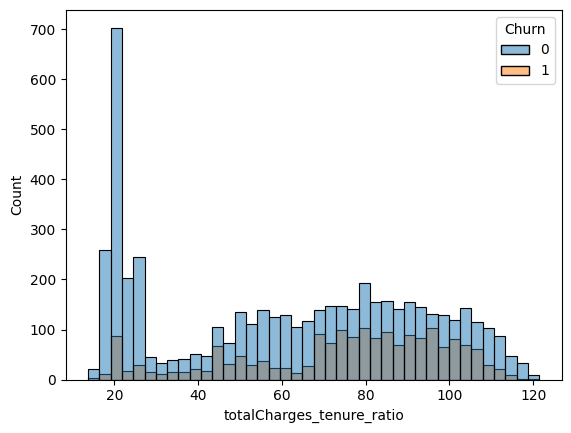

In [103]:
import seaborn as sns
# Using new feature 
sns.histplot(data=df_copy,x=df_copy['totalCharges_tenure_ratio'],hue='Churn',bins=40)

We observe the customers having low ratio of total charges and tenure (which is Approximately the monthly expense for a particular customer) tend to churn less.

# EDA for numeric data

In [129]:
report = ProfileReport(df)
report.to_file('UpdatedChurnData_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Saving the data to csv

In [127]:
df_copy.to_csv('~/documents/MSDS_VaishaliWork/MSDS600_DataScience/Week2/Assignment2/updated_churn_data.csv')

### Summary

we loaded, cleaned, and feature engineered the Churn dataset. We checked for outliers using IQR method and creating a boxplot but no major outliers exist. However few incorrect records exist where tenure is zero and monthly charges is some positive value so decided to remove those records. The "total value" column also had missing values for same records so have deleted these 11 records from the data set. 

To do some more data cleaning checked on the extra columns and as customerID is not a deciding factor for Churn rate so removed the column as of now. 

Converted all the categorical columns to numeric columns with binary label encoding. Now all the data columns are numeric. Also created a new feature, the TotalCharge/tenure ratio which is a monthly charge for a particular customer. Then created a plot and histogram for this new feature and it is observed that customers with less total charge and tenure ratio tend to churn less. 

Created an EDA with the updated and attached the same.
Finally,saved the updated data as a CSV to use for next assignment.